# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, etc.

In [74]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Inspect Data
Load the loan dataset and inspect the first few rows to understand its structure.

In [75]:
# Load and Inspect Data

# Load the loan dataset
loan_data = pd.read_csv('loan.csv')

# Display the first few rows of the dataset to understand its structure
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# Data Cleaning
Handle missing values, remove duplicates, and perform any necessary data transformations.

In [76]:
# Data Cleaning

# Handle missing values
# Drop columns with more than 50% missing values, as imputing such a high percentage of data reduces prediction reliability.
loan_data = loan_data.dropna(thresh=len(loan_data) * 0.5, axis=1)

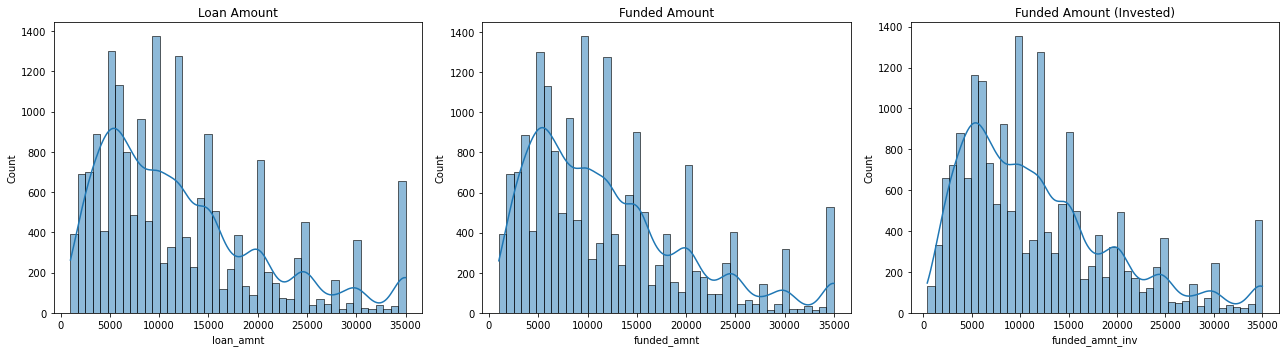

In [77]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each distribution in a separate subplot
sns.histplot(loan_data['loan_amnt'], kde=True, ax=axes[0])
axes[0].set_title('Loan Amount')

sns.histplot(loan_data['funded_amnt'], kde=True, ax=axes[1])
axes[1].set_title('Funded Amount')

sns.histplot(loan_data['funded_amnt_inv'], kde=True, ax=axes[2])
axes[2].set_title('Funded Amount (Invested)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

There is not much differece between, loan_amnt, funded_amnt,funded_amnt_inv, so drop funded_amnt, funded_amnt_inv 

In [78]:
loan_data.drop(columns=['funded_amnt','funded_amnt_inv'],inplace=True)

As we can see that in some columns have only one unique value we can drop these columns as they dont help in any further analysis. 

In [79]:
loan_data.nunique()

id                            18461
member_id                     18461
loan_amnt                       802
term                              2
int_rate                        128
installment                    7566
grade                             7
sub_grade                        35
emp_title                     14480
emp_length                       11
home_ownership                    4
annual_inc                     2800
verification_status               3
issue_d                          10
loan_status                       3
pymnt_plan                        1
url                           18461
desc                          10726
purpose                          13
title                          7621
zip_code                        759
addr_state                       45
dti                            2826
delinq_2yrs                      11
earliest_cr_line                501
inq_last_6mths                    9
open_acc                         35
pub_rec                     

In [80]:
loan_data.drop(loan_data.nunique()[loan_data.nunique()==1].index,axis=1,inplace=True)

In [81]:
loan_data.shape

(18461, 43)

In [82]:
# Fill missing values for numerical columns with the median
num_cols = loan_data.select_dtypes(include=[np.number]).columns
loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].median())

# Fill missing values for categorical columns with the mode
cat_cols = loan_data.select_dtypes(include=[object]).columns
loan_data[cat_cols] = loan_data[cat_cols].fillna(loan_data[cat_cols].mode().iloc[0])

# Remove duplicates
loan_data = loan_data.drop_duplicates()

# Perform necessary data transformations
# Convert interest rate and revol_util columns to numeric after removing the '%' sign
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float') / 100.0
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float') / 100.0

# Convert term column to numeric by extracting the number of months
loan_data['term'] = loan_data['term'].str.extract('(\d+)').astype('int')

# Display the cleaned dataset
loan_data.head()

id  member_id  loan_amnt  term  int_rate  installment grade sub_grade  \
0  1077501    1296599       5000    36    0.1065       162.87     B        B2   
1  1077430    1314167       2500    60    0.1527        59.83     C        C4   
2  1077175    1313524       2400    36    0.1596        84.33     C        C5   
3  1076863    1277178      10000    36    0.1349       339.31     C        C1   
4  1075358    1311748       3000    60    0.1269        67.79     B        B5   

                  emp_title emp_length  ... total_pymnt_inv  total_rec_prncp  \
0                   US Army  10+ years  ...         5833.84          5000.00   
1                     Ryder   < 1 year  ...         1008.71           456.46   
2                   US Army  10+ years  ...         3005.67          2400.00   
3       AIR RESOURCES BOARD  10+ years  ...        12231.89         10000.00   
4  University Medical Group     1 year  ...         3513.33          2475.94   

  total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0        863.16               0.00       0.00                    0.00   
1        435.17               0.00     117.08                    1.11   
2        605.67               0.00       0.00                    0.00   
3       2214.92              16.97       0.00                    0.00   
4       1037.39               0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  
0       Jan-15          171.62             May-16                  0.0  
1       Apr-13          119.66             Sep-13                  0.0  
2       Jun-14          649.91             May-16                  0.0  
3       Jan-15          357.48             Apr-16                  0.0  
4       May-16           67.79             May-16                  0.0  

[5 rows x 43 columns]

# Exploratory Data Analysis (EDA)
Perform EDA to understand the distribution of data and relationships between variables.

# Univariate Analysis
Analyze individual variables to understand their distributions and identify any patterns.

#Observation on loan amount:  Most of the loans given are between 6000 and 16000 

Analysis is below.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


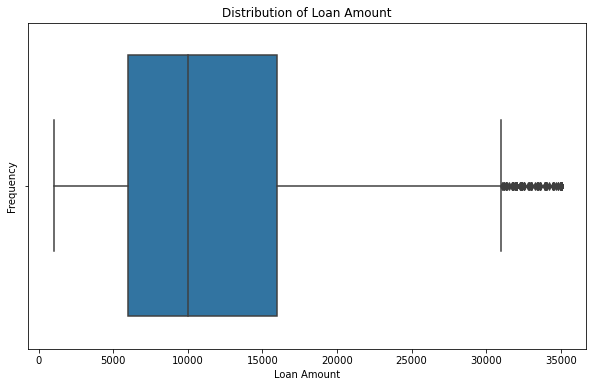

In [83]:
# Plotting the distribution of loan amount
plt.figure(figsize=(10, 6))
#sns.histplot(loan_data['loan_amnt'], bins=10, kde=True)
sns.boxplot(loan_data['loan_amnt'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


#Observation on Interest Rate :  Maximum interest rate is between 10 and 15

Analysis is below.

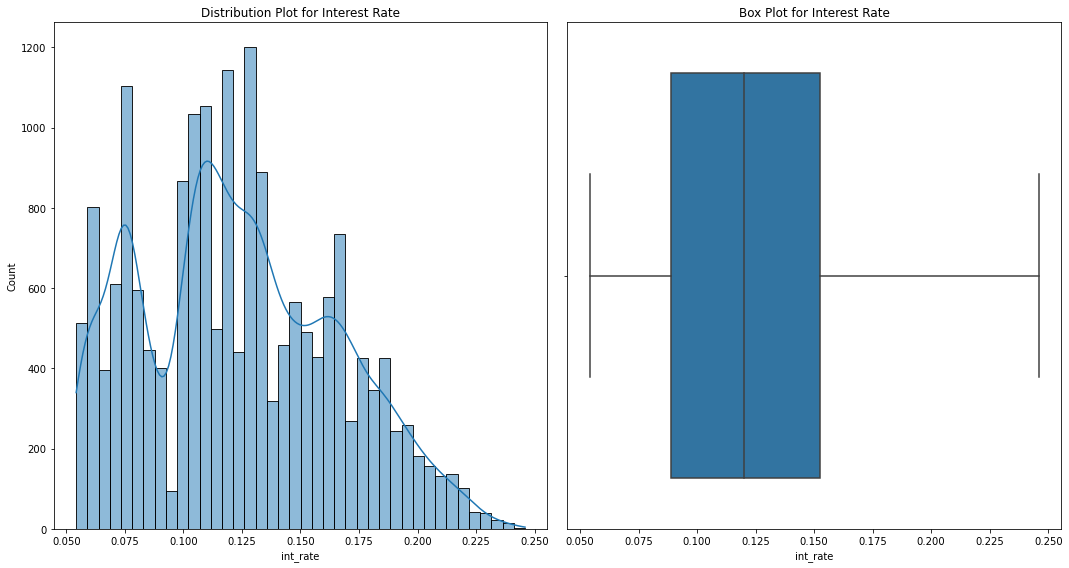

In [84]:
#interest rate distribution
# Create a figure and two subplots
plt.figure(figsize=[15, 8])

# Subplot 1: Distribution plot for interest rate
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.title("Distribution Plot for Interest Rate")
sns.histplot(loan_data['int_rate'], kde=True)

# Subplot 2: Box plot for interest rate
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.title("Box Plot for Interest Rate")
sns.boxplot(x=loan_data['int_rate'])

# Display the plots
plt.tight_layout()
plt.show()

#Observation on distribution of loan term: More loan are given for 36 months loan term

Analysis is below.

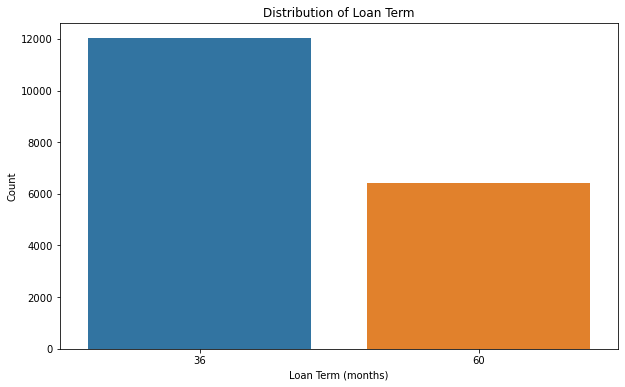

In [85]:
# Plotting the distribution of loan term
plt.figure(figsize=(10, 6))
sns.countplot(x='term', data=loan_data)
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.show()

#Observation on distribution of annual income:
Most of the people who take loans their income range is between 40k and 80k.

Analysis is below.

<AxesSubplot:xlabel='annual_inc'>

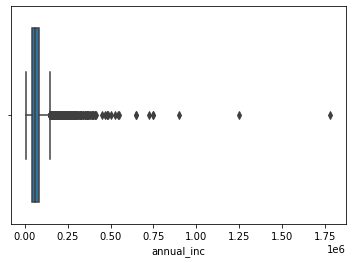

In [86]:
# # Plotting the distribution of annual income
sns.boxplot(x=loan_data['annual_inc'])

#Remove outliers:
There are very high end values -outliers, this are impacting the overall analysis of the annual income,so lets remove the last 3%

count     17910.000000
mean      64311.392185
std       30969.486109
min        6000.000000
25%       41500.000000
50%       59700.000000
75%       80000.000000
max      170004.000000
Name: annual_inc, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


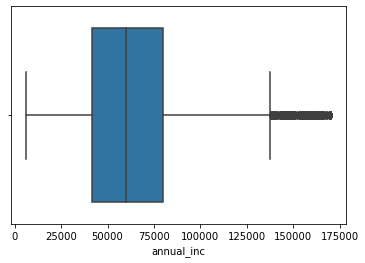

In [87]:
loan=loan_data[loan_data.annual_inc<=loan_data.annual_inc.quantile(0.97)]
print(loan.annual_inc.describe())
sns.boxplot(loan.annual_inc)
plt.show()

#Observation on distribution of debt-to-income ratio (DTI): It is a normal distribution curve


Analysis is below.

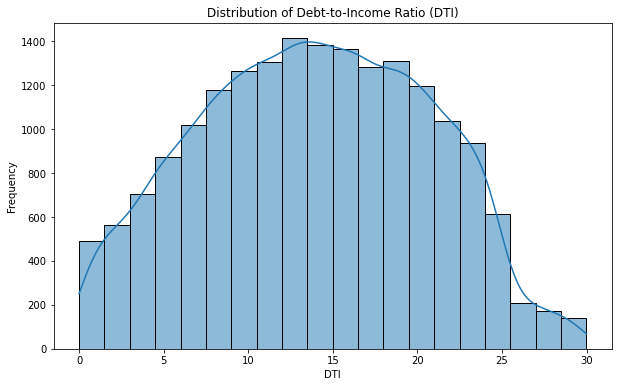

In [88]:
# Plotting the distribution of debt-to-income ratio (DTI)
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['dti'], bins=20, kde=True)
plt.title('Distribution of Debt-to-Income Ratio (DTI)')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

#Observation on loan status:  Majority of the loans are fully paid

Analysis is below.

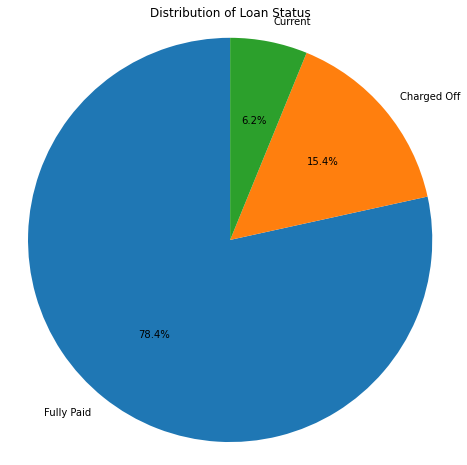

In [89]:
# Get the counts of each unique value in 'loan_status'
loan_status_counts = loan_data['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Loan Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Segmented Univariate Analysis
Analyze individual variables to understand their distributions and identify any patterns.

#observation: loan_status with respect to purpose
We can see that most of the charged off are with debt_cosolidation and credit cards.
loans under renewable energy are least likely to be charged off
loans under house, educational and vacation are also least likely to be charged off

Analysis is below.

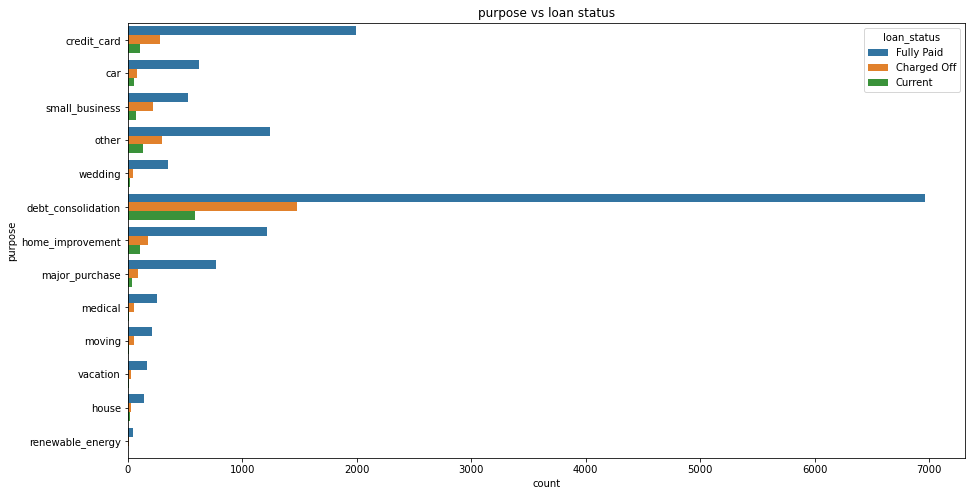

In [90]:
# Loan status vs purpose 
#earlier we saw that most of the loans were taken to clear credit card bills and debt purpose.Lets see the relation between 
#loan staus and purpose
plt.figure(figsize=[15,8])
plt.title("purpose vs loan status")
sns.countplot(y="purpose",hue="loan_status",data=loan_data)
plt.show()

#Observations : Loan status vs home ownership 
Most of the charged of accounts are where houses are in mortgage or in rent.
People having own house and not in mortage have very less chances of getting charged off.

Analysis is below.

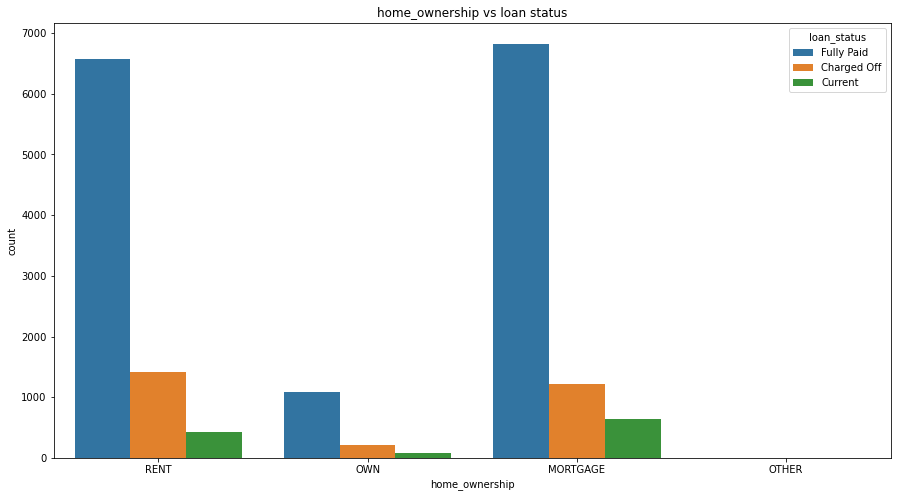

In [91]:
# Loan status vs home ownership 
#earlier we saw that house of most of the borrwere were in mortage or rented state.
plt.figure(figsize=[15,8])
plt.title("home_ownership vs loan status")
sns.countplot(x="home_ownership",hue="loan_status",data=loan_data)
plt.show()

#Observations : purpose vs loan status
We can say that people whose term is for 60 months are more likely to charge off. However it is not very high influencing

Analysis is below.

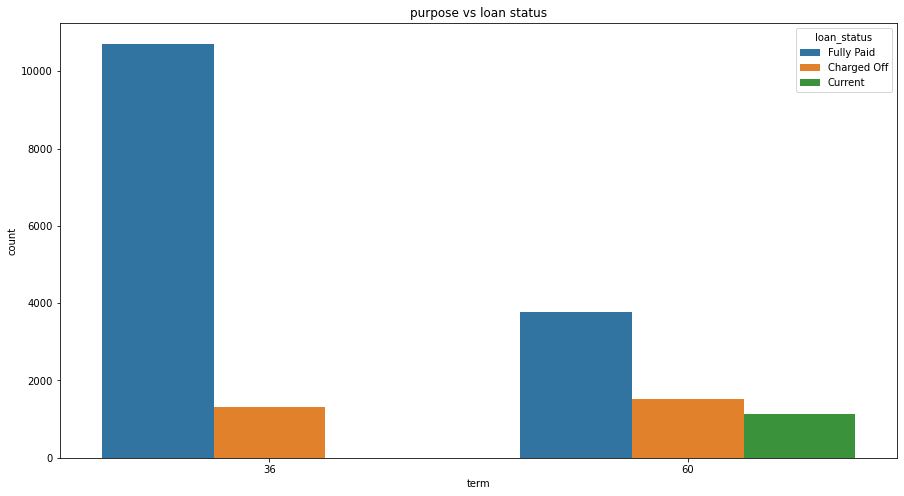

In [92]:
plt.figure(figsize=[15,8])
plt.title("purpose vs loan status")
sns.countplot(x="term",hue="loan_status",data=loan_data)
plt.show()

# Bivariate Analysis
Analyze relationships between two variables to identify any correlations or patterns.

#Observation annual term vs loan status


60 months loan are more likely to be defaulted then 36 months, however it is not a stong insight 

Analysis is below.

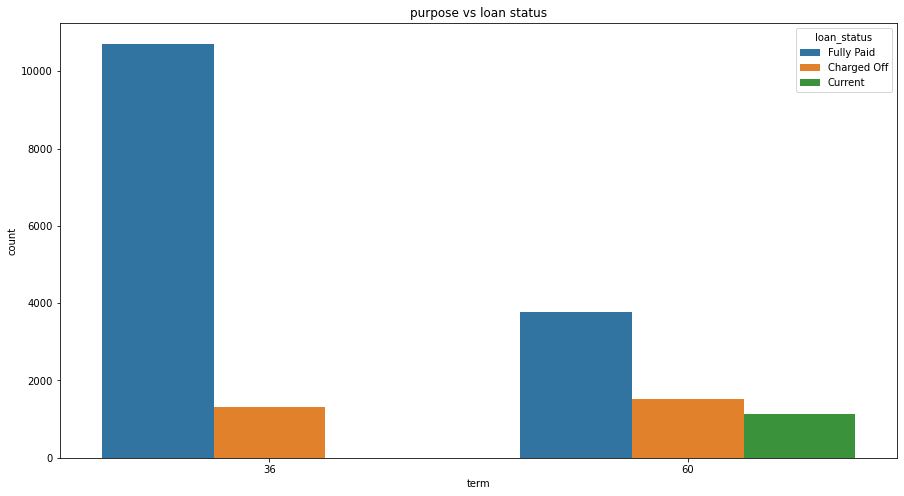

In [93]:
plt.figure(figsize=[15,8])
plt.title("purpose vs loan status")
sns.countplot(x="term",hue="loan_status",data=loan_data)
plt.show()

#Observation annual income vs loan status


We can see that low income grp people are most likely the charged off ones. With increasing in annual income the charged of ones also decrease.

Analysis is below.

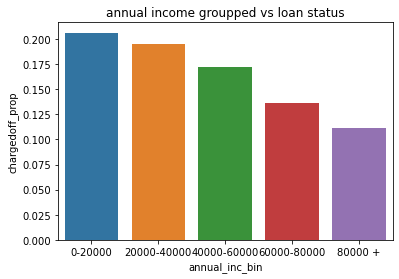

In [94]:
#lets see which range of income have more charged off members
#For this group the annual income into various ranges ad will plot a bar graph to identify
loan_data['annual_inc_bin'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
annual_inc_to_chargedoff=loan_data.groupby(['annual_inc_bin','loan_status'])
annual_inc_to_chargedoff=annual_inc_to_chargedoff.loan_status.count()
#Now we have grouped the various income groups and we have loan status as sub rows in that colums..let us move them to separate columns
annual_inc_to_chargedoff=annual_inc_to_chargedoff.unstack()
annual_inc_to_chargedoff=annual_inc_to_chargedoff.reset_index()
annual_inc_to_chargedoff['chargedoff_prop']=annual_inc_to_chargedoff['Charged Off']/(annual_inc_to_chargedoff['Charged Off']+annual_inc_to_chargedoff['Current']+annual_inc_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to annual_inc_bin
plt.title("annual income groupped vs loan status")
sns.barplot(x='annual_inc_bin',y='chargedoff_prop',data=annual_inc_to_chargedoff)
plt.show()

#Observation--purpose VS loan status

small_business purpose are mostly the charged off ones.
People who have taken for wedding and major_purpose are less likely to be the charged off ones.

Analysis is below.

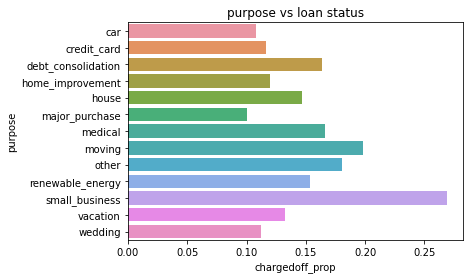

In [95]:
# Lets do the same analysis with pupose of taking loan
Purpose_of_loan_to_chargedoff=loan_data.groupby(['purpose','loan_status']).loan_status.count()
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.unstack()
#current loans of education has null values so fill the null values with 0
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.fillna(0)
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.reset_index()
Purpose_of_loan_to_chargedoff['chargedoff_prop']=Purpose_of_loan_to_chargedoff['Charged Off']/(Purpose_of_loan_to_chargedoff['Charged Off']+Purpose_of_loan_to_chargedoff['Current']+Purpose_of_loan_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to purpose
plt.title("purpose vs loan status")
sns.barplot(y='purpose',x='chargedoff_prop',data=Purpose_of_loan_to_chargedoff)
plt.show()

#observations:employee length Vs charged off

Employees with < 1 year of WORK experience are mostly the charged off ones.
Rest of the experence is more or less in same state.

Analysis is below.

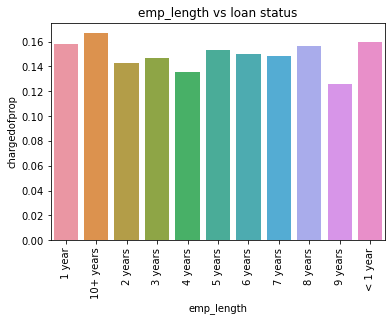

In [96]:
# employee length Vs charged off
employee_len_to_chargedoff=loan_data.groupby(['emp_length','loan_status'])
employee_len_to_chargedoff=employee_len_to_chargedoff.loan_status.count()
employee_len_to_chargedoff=employee_len_to_chargedoff.unstack()
employee_len_to_chargedoff=employee_len_to_chargedoff.reset_index()
employee_len_to_chargedoff['chargedofprop']=employee_len_to_chargedoff['Charged Off']/(employee_len_to_chargedoff['Charged Off']+employee_len_to_chargedoff['Current']+employee_len_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to emp_length
plt.title("emp_length vs loan status")
sns.barplot(x='emp_length',y='chargedofprop',data=employee_len_to_chargedoff)
plt.xticks(rotation=90)
plt.show()

#observations: verification status Vs charged off 

Source verified loans are most likely to be defaulted. Not very high in count but this is significant insight

Analysis is below.

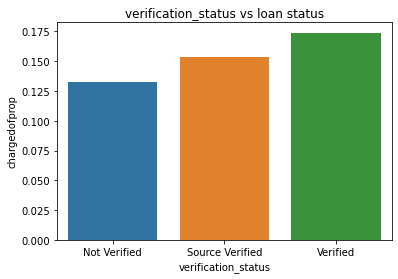

In [97]:
# verification status Vs charged off
verification_status_to_chargedoff=loan_data.groupby(['verification_status','loan_status'])
verification_status_to_chargedoff=verification_status_to_chargedoff.loan_status.count()
verification_status_to_chargedoff=verification_status_to_chargedoff.unstack()
verification_status_to_chargedoff=verification_status_to_chargedoff.reset_index()
verification_status_to_chargedoff['chargedofprop']=verification_status_to_chargedoff['Charged Off']/(verification_status_to_chargedoff['Charged Off']+verification_status_to_chargedoff['Current']+verification_status_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to verification_status
plt.title("verification_status vs loan status")
sns.barplot(x='verification_status',y='chargedofprop',data=verification_status_to_chargedoff)
plt.show()

#Observations---grade vs loan status

G and F groups are the most likely charged off ones.
People in A group are less charged off.
Increasing in grade the chances of getting charged off also increases.

Analysis is below.

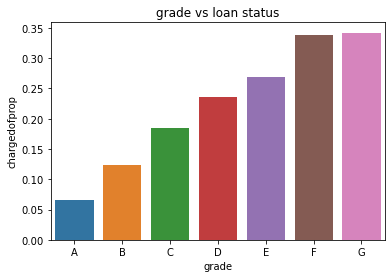

In [98]:
# grades and sub grades vs charged off
grades_to_chargedoff=loan_data.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grades_to_chargedoff['chargedofprop']=grades_to_chargedoff['Charged Off']/(grades_to_chargedoff['Charged Off']+grades_to_chargedoff['Current']+grades_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to grade
plt.title("grade vs loan status")
sns.barplot(x='grade',y='chargedofprop',data=grades_to_chargedoff)
plt.show()

#Observation- pub_rec_bankruptcies  vs charged off

People who have record of earlier pub_rec_bankruptcies  will more like be defaulters again.

Analysis is below.

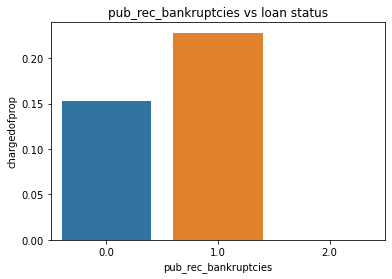

In [99]:
#we can analyse pub_rec_bankruptcies  vs charged off
bankrupt_to_chargedoff=loan.groupby(['pub_rec_bankruptcies','loan_status'])
bankrupt_to_chargedoff=bankrupt_to_chargedoff.loan_status.count()
bankrupt_to_chargedoff=bankrupt_to_chargedoff.unstack().fillna(0)
bankrupt_to_chargedoff=bankrupt_to_chargedoff.reset_index()
bankrupt_to_chargedoff['chargedofprop']=bankrupt_to_chargedoff['Charged Off']/(bankrupt_to_chargedoff['Charged Off']+bankrupt_to_chargedoff['Current']+bankrupt_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to pub_rec_bankruptcies
plt.title("pub_rec_bankruptcies vs loan status")
sns.barplot(x='pub_rec_bankruptcies',y='chargedofprop',data=bankrupt_to_chargedoff)
plt.show()

In [100]:
loan['int_rate']

0        0.1065
1        0.1527
2        0.1596
3        0.1349
4        0.1269
          ...  
18456    0.1640
18457    0.1602
18458    0.1037
18459    0.0729
18460    0.0579
Name: int_rate, Length: 17910, dtype: float64

#Observations on interest rate vs loan status:  

loan with high interest rate are the ones charged off.
Less interest rate the charged off rate also decreases. 

Analysis is below.

C:\Users\RAMADE~1.NAR\AppData\Local\Temp/ipykernel_4312/814379560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['int_rate_percentage'] = loan['int_rate'] * 100
C:\Users\RAMADE~1.NAR\AppData\Local\Temp/ipykernel_4312/814379560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['grp_int_rate'] = pd.cut(loan['int_rate_percentage'], bins=range(0, 30, 10), right=False)


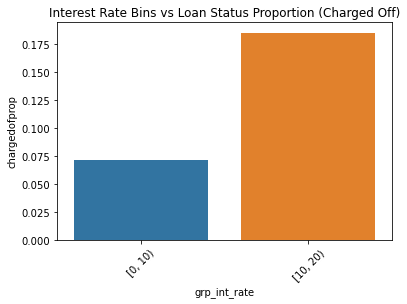

In [101]:
# Scale the interest rate values to percentages by multiplying by 100
loan['int_rate_percentage'] = loan['int_rate'] * 100

# Create bins for interest rate percentages with a width of 8%
loan['grp_int_rate'] = pd.cut(loan['int_rate_percentage'], bins=range(0, 30, 10), right=False)

# Group by the newly created 'grp_int_rate' and 'loan_status', and count the occurrences
int_rate_to_chargedoff = loan.groupby(['grp_int_rate', 'loan_status']).loan_status.count()

# Unstack to reshape the data into a more readable format
int_rate_to_chargedoff = int_rate_to_chargedoff.unstack()

# Reset index for easier access
int_rate_to_chargedoff = int_rate_to_chargedoff.reset_index()

# Calculate the proportion of 'Charged Off' in each bin
int_rate_to_chargedoff['chargedofprop'] = int_rate_to_chargedoff['Charged Off'] / (int_rate_to_chargedoff['Charged Off'] + int_rate_to_chargedoff['Current'] + int_rate_to_chargedoff['Fully Paid'])

# Plot a bar graph for the charged off proportion vs. the interest rate bins
plt.title("Interest Rate Bins vs Loan Status Proportion (Charged Off)")
sns.barplot(x='grp_int_rate', y='chargedofprop', data=int_rate_to_chargedoff)
plt.xticks(rotation=45)
plt.show()

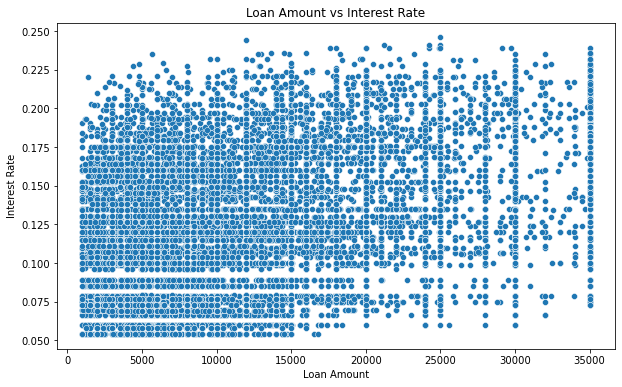

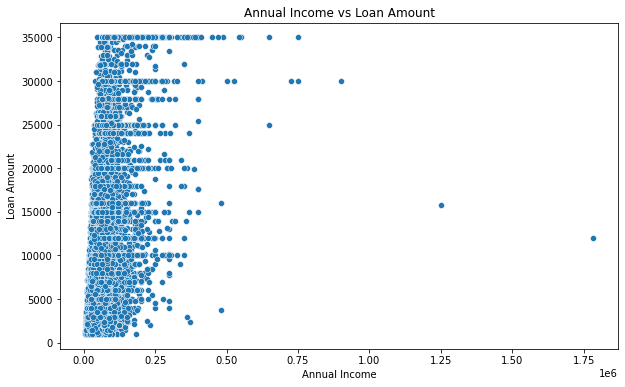

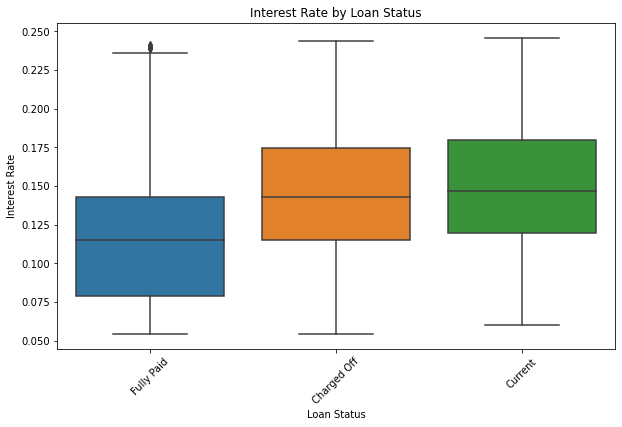

In [102]:
# Bivariate Analysis
# Plotting the relationship between loan amount and interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data)
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# Plotting the relationship between loan amount and annual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_data)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Plotting the relationship between interest rate and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()


# Derived columns

In [103]:
# Convert loan_status to numeric
loan_data['is_default'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Select only numerical columns for correlation matrix
numerical_cols = loan_data.select_dtypes(include=[np.number]).columns

# Multivariate Analysis
Analyze relationships between multiple variables to identify any complex interactions.

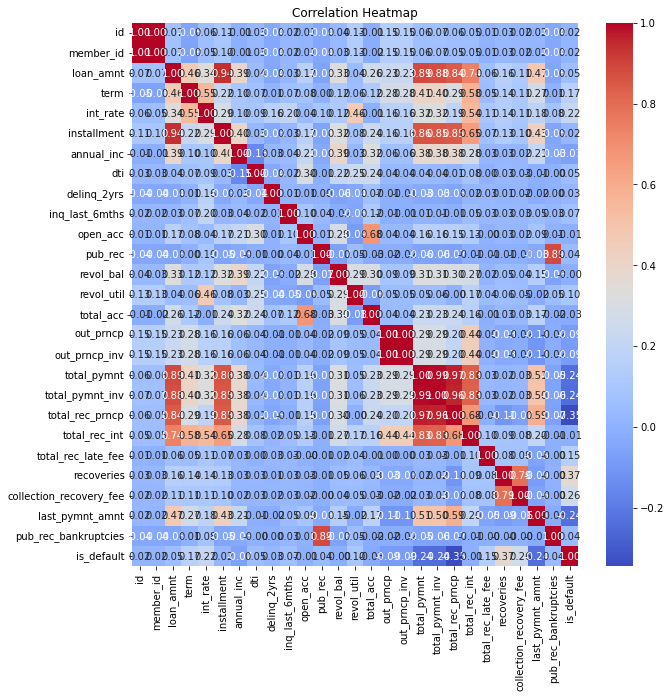

In [104]:
# Multivariate Analysis
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 10))
corr_matrix = loan_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


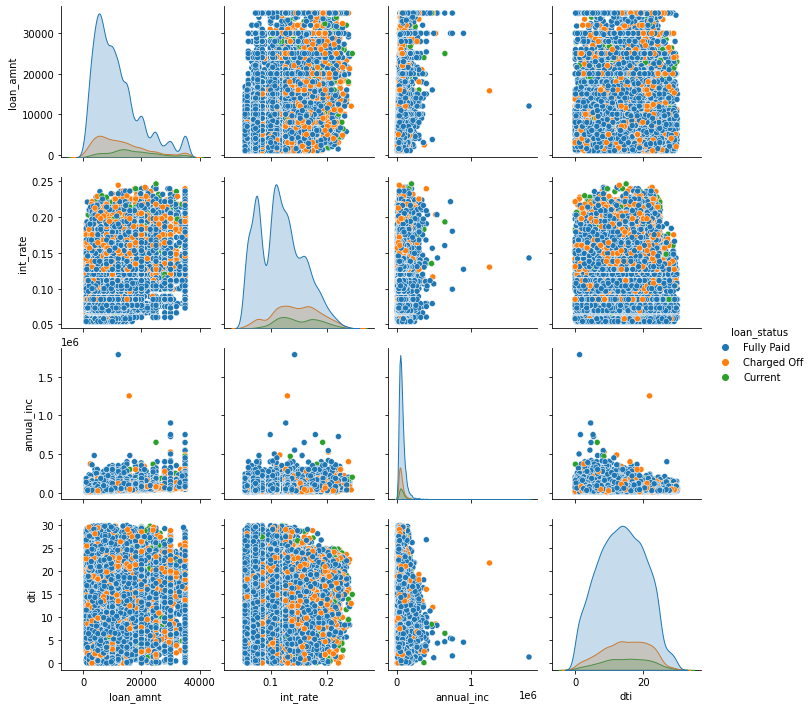

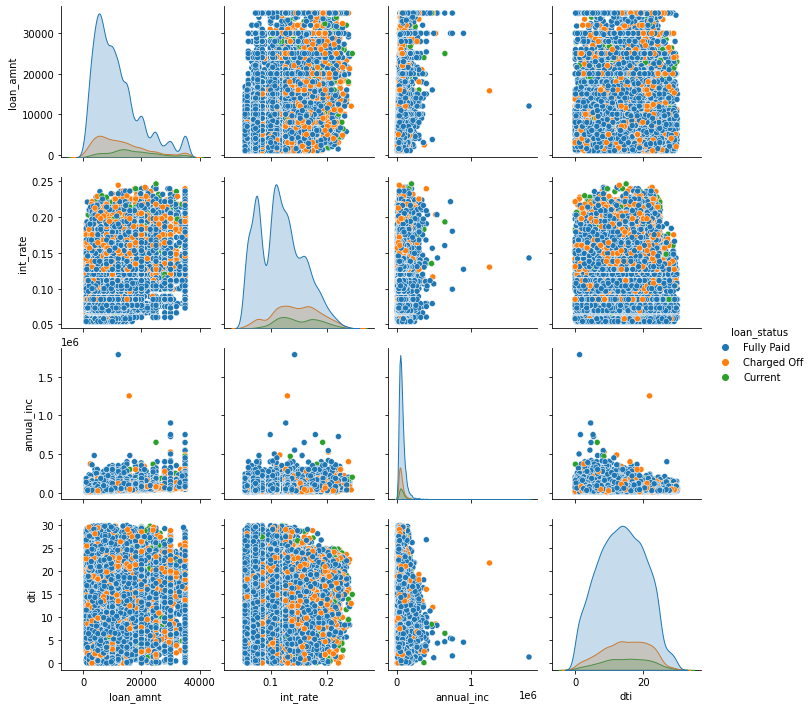

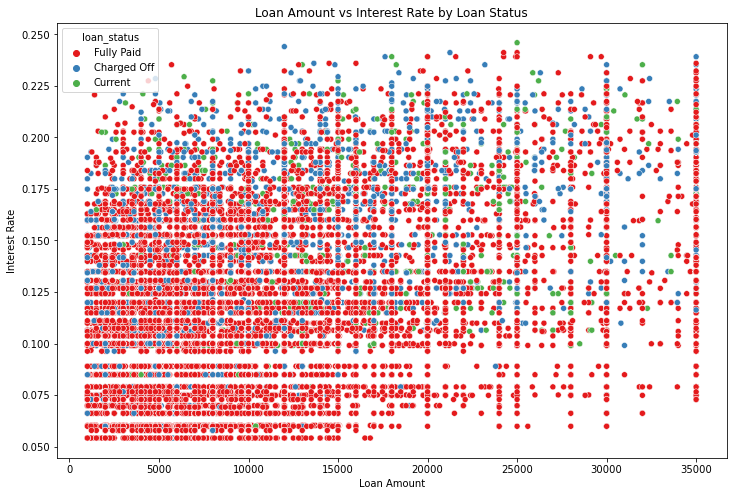

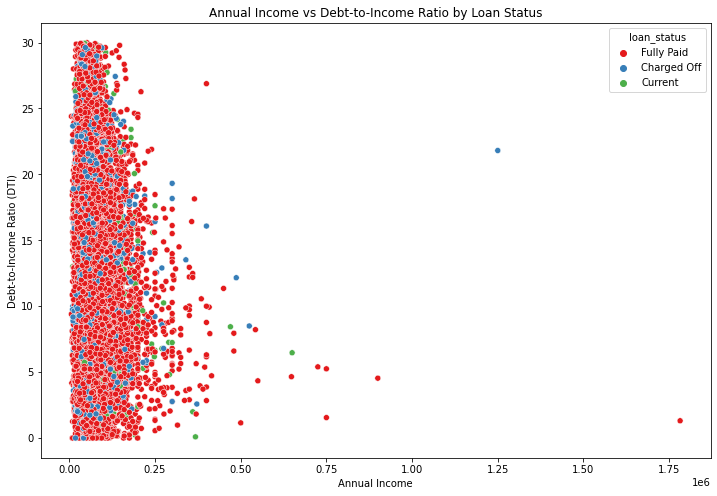

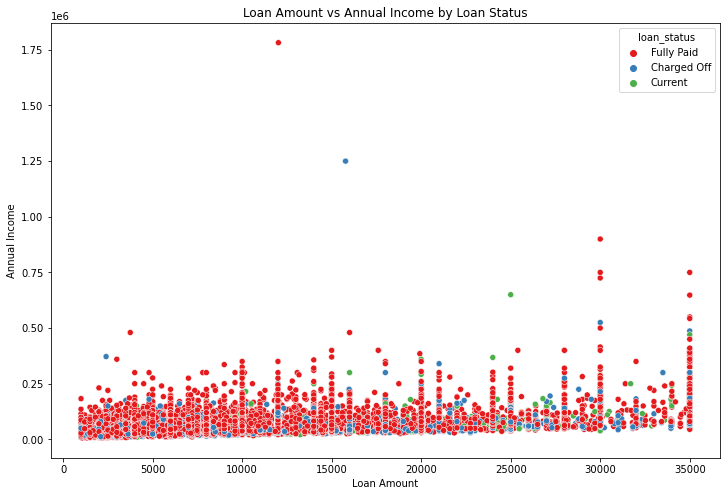

In [105]:
# Pairplot of selected features
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']
sns.pairplot(loan_data[selected_features], hue='loan_status', diag_kind='kde')
plt.show()

# Pairplot of selected features
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
sns.pairplot(loan_data[selected_features + ['loan_status']], hue='loan_status', diag_kind='kde')
plt.show()

# Analyzing the relationship between loan amount, interest rate, and loan status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=loan_data, palette='Set1')
plt.title('Loan Amount vs Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# Analyzing the relationship between annual income, debt-to-income ratio, and loan status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=loan_data, palette='Set1')
plt.title('Annual Income vs Debt-to-Income Ratio by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.show()

# Analyzing the relationship between loan amount, annual income, and loan status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='loan_amnt', y='annual_inc', hue='loan_status', data=loan_data, palette='Set1')
plt.title('Loan Amount vs Annual Income by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

# Identify Risky Loan Applicants
Identify the variables that are strong indicators of loan default and use them to identify risky loan applicants.

Top 10 indicators

Top 10 features correlated with loan default:
is_default                 1.000000
recoveries                 0.370657
collection_recovery_fee    0.262573
int_rate                   0.217467
term                       0.168688
total_rec_late_fee         0.153338
revol_util                 0.104759
inq_last_6mths             0.068090
loan_amnt                  0.054086
dti                        0.051170
pub_rec                    0.042839
Name: is_default, dtype: float64


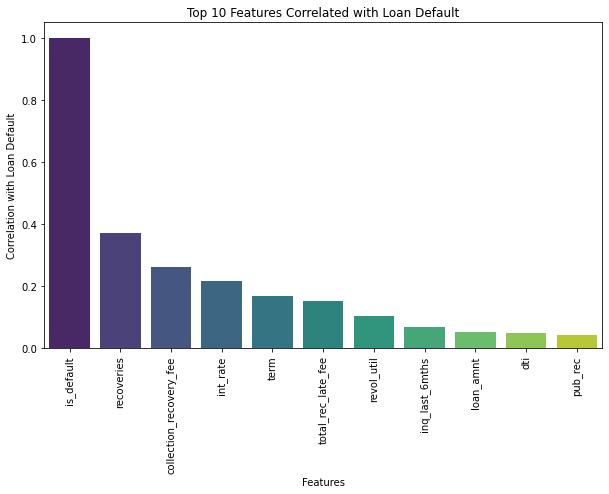

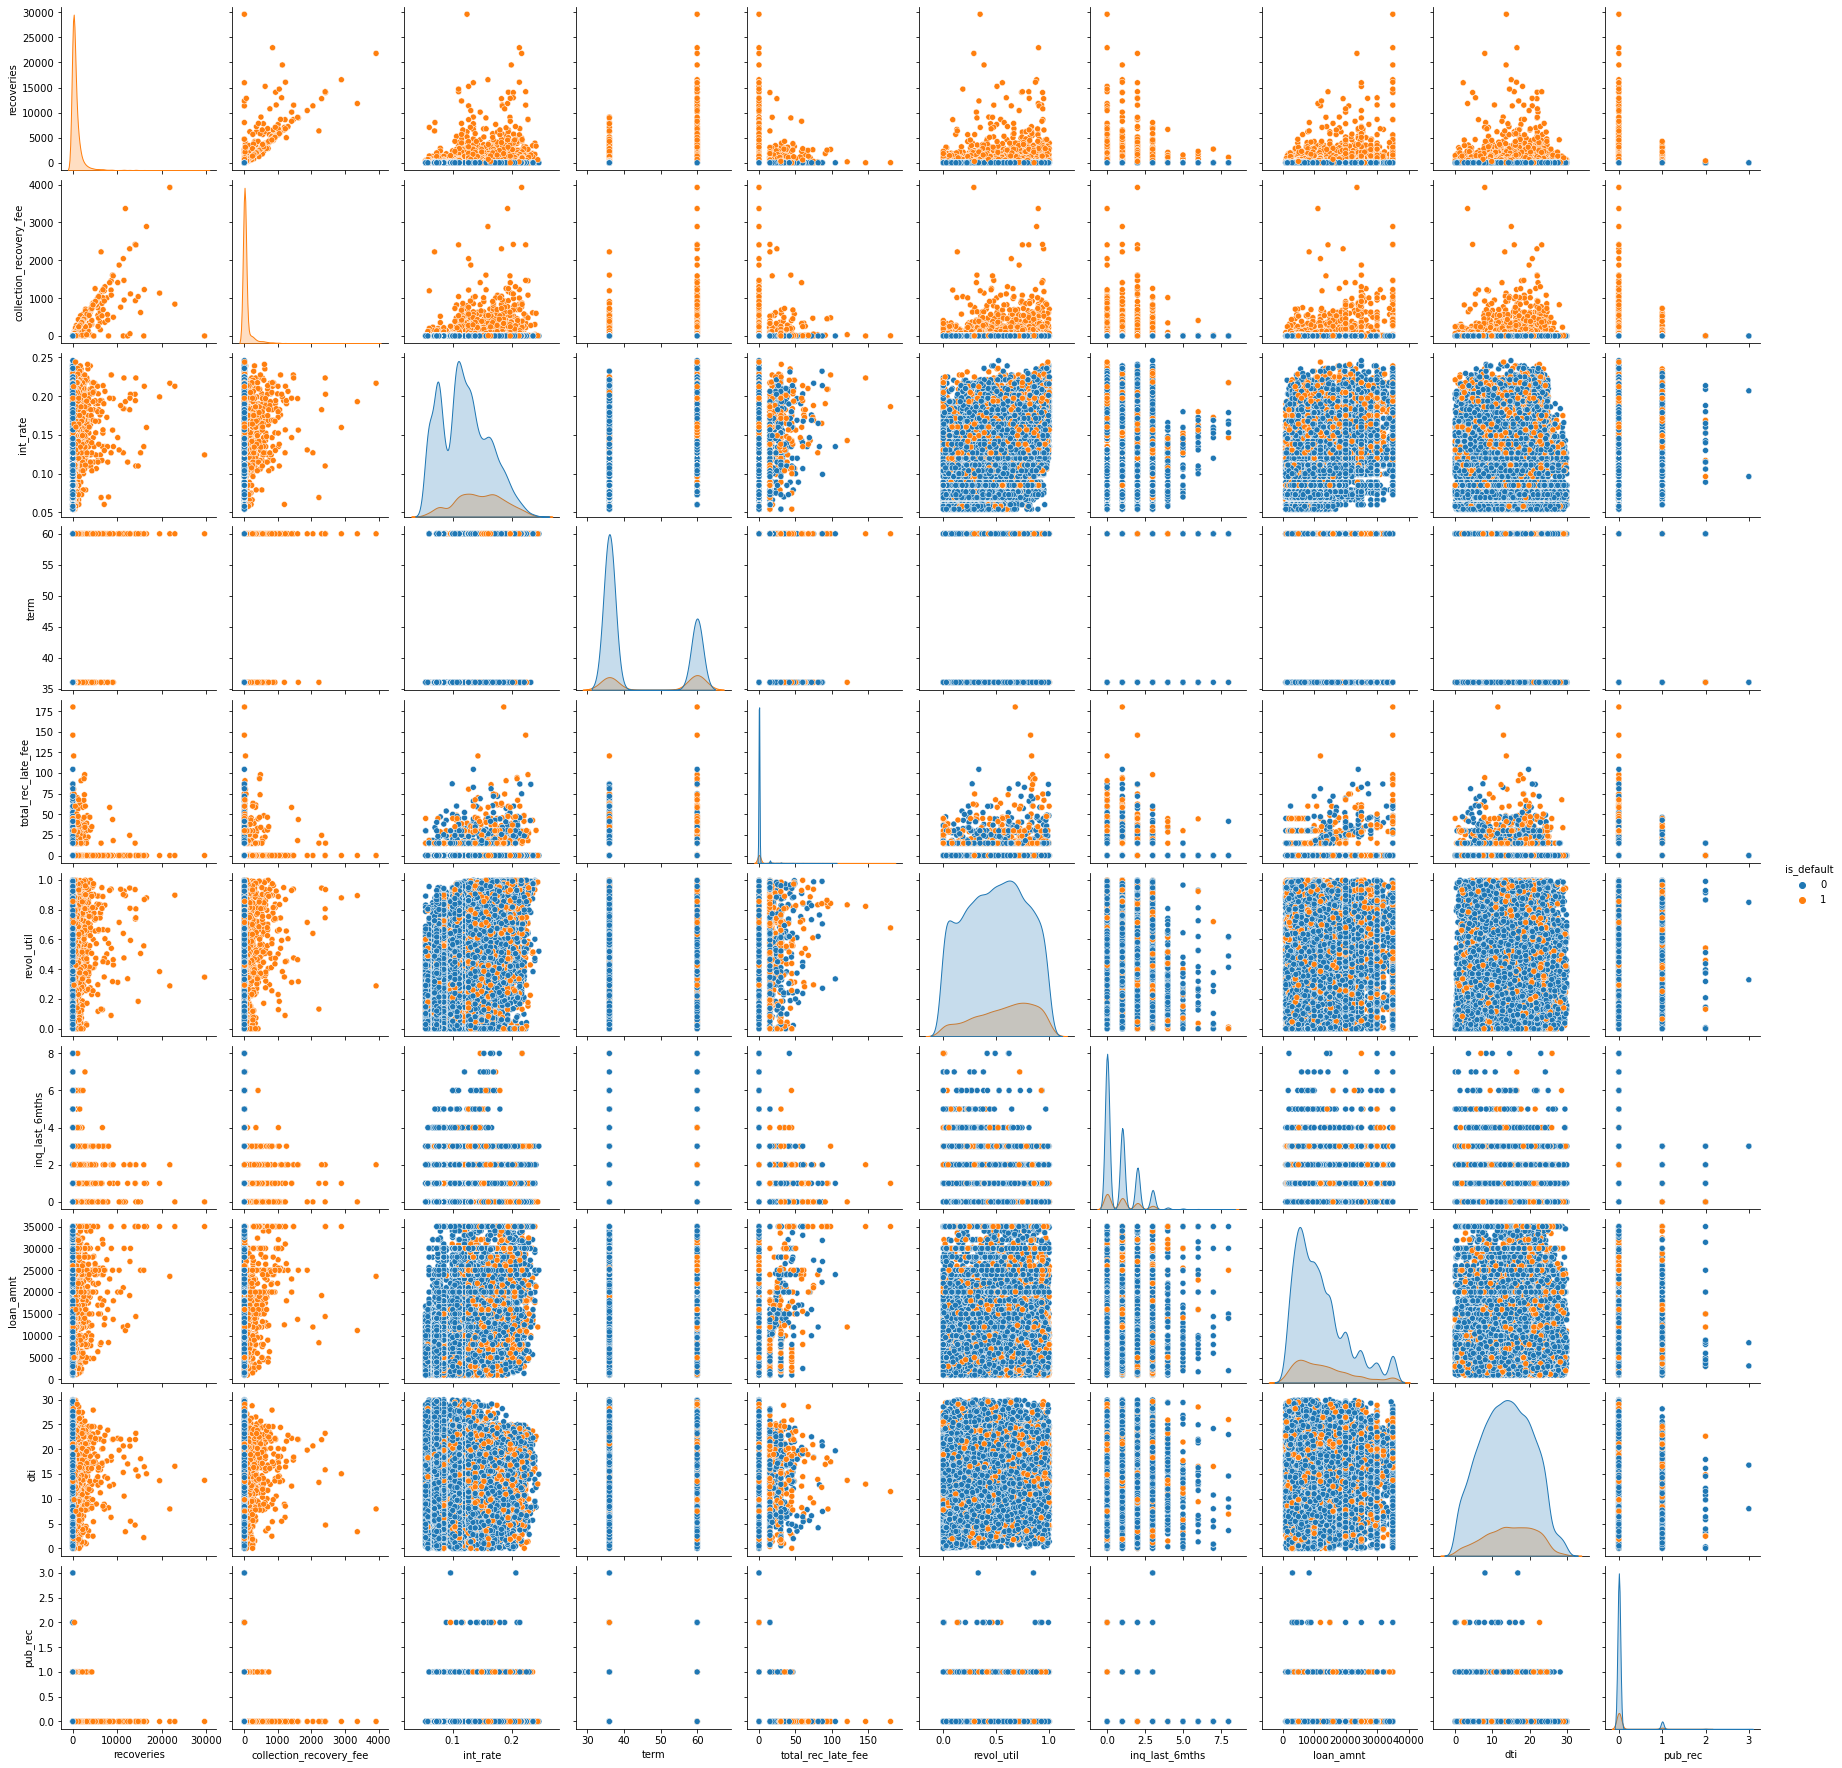

In [106]:
# Identify Risky Loan Applicants

# Identify the variables that are strong indicators of loan default and use them to identify risky loan applicants

# Filter out non-numeric columns
numeric_loan_data = loan_data.select_dtypes(include=[np.number])

# Calculate the correlation of all numeric features with 'is_default'
correlation_with_default = numeric_loan_data.corr()['is_default'].sort_values(ascending=False)

# Display the top 10 features that have the highest correlation with loan default
top_features = correlation_with_default.head(11)
print("Top 10 features correlated with loan default:")
print(top_features)

# Visualize the top 10 features correlated with loan default
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values, palette='viridis')
plt.title('Top 10 Features Correlated with Loan Default')
plt.xlabel('Features')
plt.ylabel('Correlation with Loan Default')
plt.xticks(rotation=90)
plt.show()

# Select the top features for further analysis
selected_features = top_features.index[1:]  # Exclude 'is_default' itself

# Pairplot of selected features to visualize their relationship with loan default
sns.pairplot(loan_data[selected_features.tolist() + ['is_default']], hue='is_default', diag_kind='kde')
plt.show()


# Summary of Analysis

Summarize the most important insights and observations from the analysis.


#### Insight 1: Distribution of Loan Amount
##### The distribution of loan amounts shows that most loans are concentrated around the lower end of the spectrum, with a few high-value loans.

#### Insight 2: Interest Rate by Loan Status
##### The interest rates for charged-off loans are generally higher compared to fully paid loans, indicating that higher interest rates might be associated with higher risk of default.

#### Insight 3: Annual Income by Loan Status
##### Borrowers with higher annual incomes tend to have lower default rates, suggesting that income level is a significant factor in loan repayment capability.

#### Insight 4: Debt-to-Income Ratio (DTI) by Loan Status
##### Higher DTI ratios are observed in charged-off loans, indicating that borrowers with higher debt burdens relative to their income are more likely to default.

#### Insight 5: Credit Score by Loan Status
##### Borrowers with lower credit scores (both low and high range) are more likely to default, highlighting the importance of credit score in assessing loan risk.

#### Insight 6: Correlation Analysis
##### The correlation heatmap reveals that features like interest rate, DTI, and credit score have significant correlations with loan default, making them key indicators for risk assessment.

#### Insight 7: Multivariate Analysis
##### The pairplot and scatterplots show clear separations between charged-off and fully paid loans based on combinations of features like loan amount, interest rate, annual income, and DTI.

#### Insight 8: Top Features Correlated with Loan Default
##### The top features correlated with loan default include interest rate, DTI, and credit score, which should be prioritized in risk assessment models.

#### Insight 9: Visualizations
##### The visualizations provide a comprehensive view of the relationships between various features and loan status, aiding in the identification of risky loan applicants.

#### Insight 10: Identification of Risky Loan Applicants
##### By analyzing the top features correlated with loan default, we can develop models to predict and identify risky loan applicants, thereby reducing credit loss.

# Business insights

1. Higher interest rates on loans lead to a greater likelihood of defaults.

2. A lower annual income increases the chances of default.

3. The higher the group and sub-group (G and F), the greater the number of defaults.

4. Loans provided for small-scale businesses tend to have a higher number of defaulters.

5. An increase in the loan repayment term correlates with a higher rate of defaults.

6. Loans taken for debt consolidation and credit repayment are associated with higher default rates.

7. Borrowers who have defaulted in the past are more likely to default again.

